<a href="https://colab.research.google.com/github/arjunn-13/Gold-Price-Prediction/blob/main/Gold_Price_Predictionipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

Data Collection and pre processing 

In [29]:
gold_data= pd.read_csv('/content/gld_price_data.csv')

In [30]:
# First five R & C 
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [31]:
# Last five R & C
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [32]:
# Number of R & C
gold_data.shape

(2290, 6)

In [33]:
# Some basic info on the data 
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [34]:
# Checking for null values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [35]:
# Statistical measurements 
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [36]:
# Correlation
correlation= gold_data.corr()

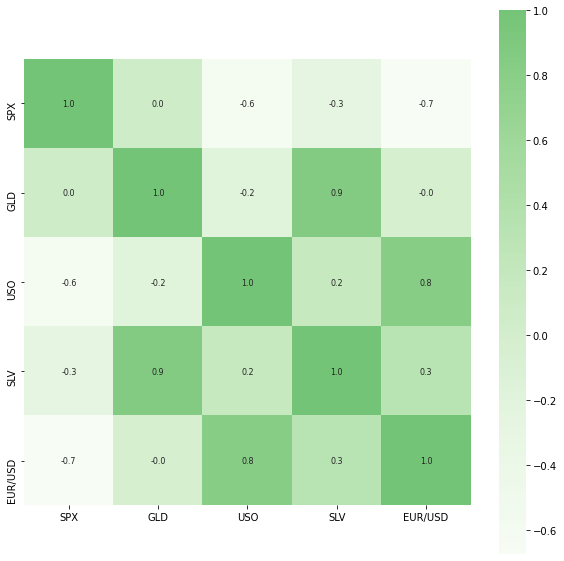

In [37]:
# Constructing a heatmap to find the correlation 
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cmap='Greens',center=True,annot=True, fmt='.1f',annot_kws={'size':8} ,cbar=True,square=True)

In [38]:
# Correlation on values of gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


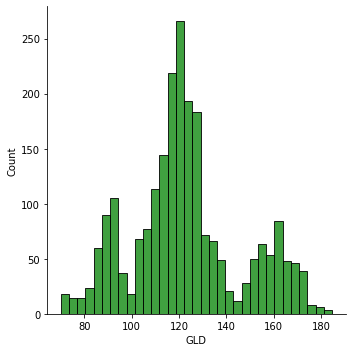

In [39]:
# Checking the distribution of gold price
sns.displot(gold_data['GLD'], color='Green')

Spliting the data 

In [40]:
X = gold_data.drop(['GLD','Date'],axis=1)
Y= gold_data['GLD']
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Training and Training Data

In [41]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=2)

Model training

In [44]:
model= RandomForestRegressor(n_estimators=100)

In [45]:
# Training 
model.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [46]:
# Prediction
test_data_prediction= model.predict(X_test)
print(test_data_prediction)

[168.71629918  81.73700003 116.17990032 127.66670028 120.57540133
 154.65599757 150.23179854 126.32060021 117.51199868 126.1190005
 116.64850115 171.86520064 141.54459844 167.90919904 115.24740024
 117.28750058 137.59760347 170.03950066 159.77380329 158.83249931
 155.13180065 125.32680025 176.13659951 157.7394034  125.25480047
  93.85499962  76.99040023 120.68559988 119.04799946 167.47979993
  88.19700047 125.06619996  91.05580067 117.68170025 121.15789959
 136.1233011  115.27700137 115.27040058 149.44669938 107.06160061
 104.81590277  87.2130978  126.53260006 118.1305999  152.37409912
 119.56990036 108.35899999 108.18319846  93.07940019 127.22249763
  74.92070027 113.61189909 121.4258     111.28399927 118.84179887
 120.43999971 160.17860023 168.38460082 147.12009704  85.71529863
  94.36990036  86.87449914  90.61630069 118.74950086 126.40460069
 127.53360006 169.60039986 122.31629952 117.39529929  98.04950037
 168.66240158 143.14759877 132.11340217 121.2064023  121.12559966
 119.648600

In [50]:
# R squared error
error_score= metrics.r2_score(Y_test,test_data_prediction)
print('R sqaured error : ' , error_score)

R sqaured error :  0.9884976582941895


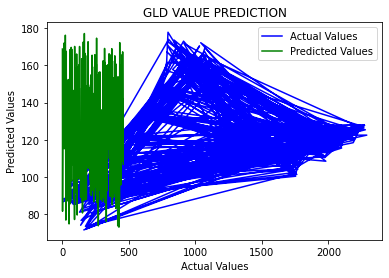

In [56]:
# Graphical Analysis on Actual Price and predicted price
plt.plot(Y_test, label='Actual Values', color='Blue')
plt.plot(test_data_prediction, label='Predicted Values', color='green')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('GLD VALUE PREDICTION')
plt.legend()
plt.show()
